# Import dependencies

In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Utility

In [2]:
### Kudos to http://www.nxn.se/valent/extract-cluster-elements-by-color-in-python

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        if c == 'grey':
            continue
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-10:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

# Load the dataset 'cities_coordinates.txt'

In [25]:
### TO DO ###
X = np.loadtxt('cities_coordinates.txt', delimiter=',', usecols=(0, 1, 2))
label = np.loadtxt('cities_coordinates.txt', dtype=np.str , delimiter=',', usecols=(3))  #;print(label[0])

# Hierarchical clustering and dendrograms

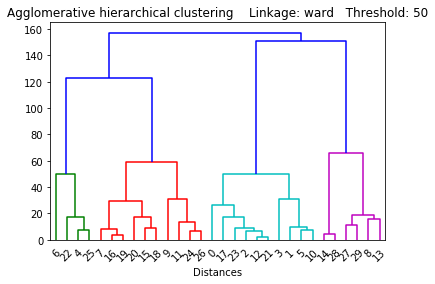

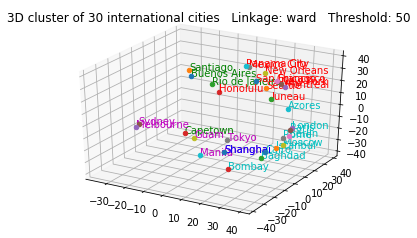

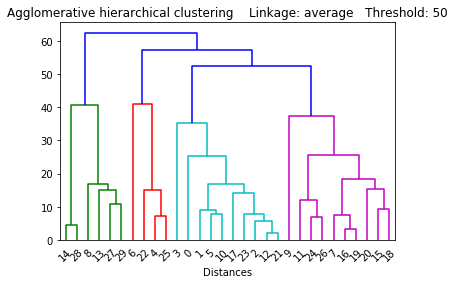

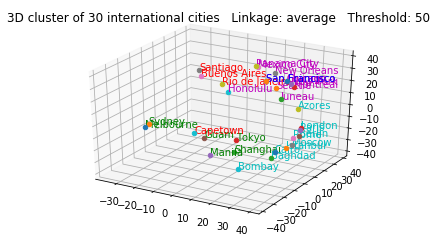

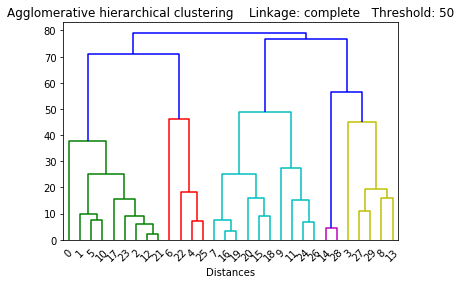

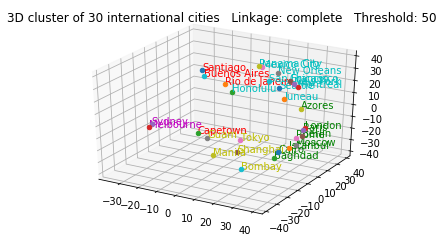

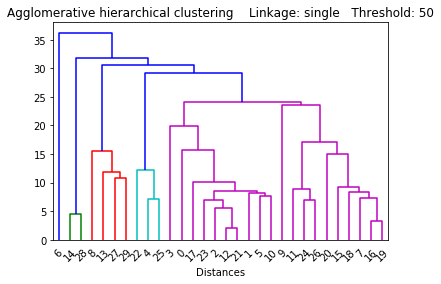

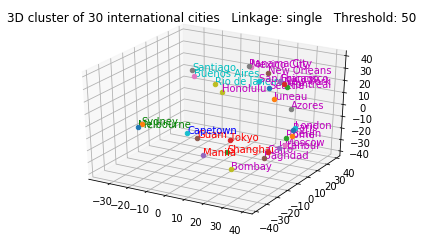

In [43]:
color_threshold = 50

for l, linkage_type in enumerate(['ward', 'average', 'complete', 'single']):
    # Do hierarchichal clustering:
    clusters_hierarchy = linkage(X, linkage_type)
    plt.figure(l+1)
    plt.title("Agglomerative hierarchical clustering    Linkage: " + str(linkage_type) + "   Threshold: " + str(color_threshold))
    plt.xlabel("Distances") # Depending on the orientation of your dendrogram, it could become plt.ylabel
    # Extract and display the dendrogram:
    cities_dendrogram = dendrogram(clusters_hierarchy)
    # Get the colors of every city:
    colored_clusters = get_cluster_classes(cities_dendrogram)
    fig = plt.figure(l+5)
    ax = plt.axes(projection='3d')
    ax.set_title("3D cluster of 30 international cities   Linkage: " + str(linkage_type) + "   Threshold: " + str(color_threshold))
    # Display every city on a scatter plot, with the color of its cluster: 
    for color, cluster_cities in colored_clusters.items():
                                                            #         print(color, cluster_cities)
        # Find the index in y of every city in cluster_cities:
        cluster_cities_idx = cluster_cities
        for city_idx in cluster_cities_idx:
            city_idx = int(city_idx)
            # Extract the 3D coordinates of the city, and its name:
            city_point = X[city_idx,:]
            city_name = label[city_idx]
            # Add the city point to the scatterplot, color this point with the color of its cluster in the dendrogram:
            ax.scatter3D(city_point[0], city_point[1], city_point[2], cmap=color)
            # Annotate the scatterplot with the name of the city, colored as well:
            ax.text(city_point[0], city_point[1], city_point[2],city_name, color=color)
plt.show()